<a href="https://colab.research.google.com/github/srijit43/Machine-Learning-Lessions/blob/main/Capstone_LinR_TeamMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing dependencies

In [ ]:
df_car = pd.read_csv('car data.csv')

In [ ]:
df_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


We would be proceeding with the car data.csv file and our initial analysis tells that selling price is the label and rest are features. The data set looks streamlined enough but let us do some exploratory data analytics.

In [ ]:
z = df_car.shape
print("Rows:",z[0])
print("Columns:",z[1])


Rows: 301
Columns: 9


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df_car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


The price of a car depends on a variety of factors, while Present Price, Kms_driven are numerical. Year, fuel type , seller, transmission type need to be converted to numerical equivalents in order to apply machine learning on the data.

In [ ]:
print(df_car.Transmission.value_counts())
print(df_car.Year.value_counts())
print(df_car.Fuel_Type.value_counts())
print(df_car.Seller_Type.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


We see that the categorical columns play a role in determining the selling price of the car. We need to show how the categorical columns correlate to the label. Two columns were altered here. 1 -> car was changed to brand to indicate the manufacturing company and 2 -> year of production was changed to years in use to indicate age of car

In [ ]:
df_car['Driving_Age'] = 2023 - df_car['Year']
df_car.drop('Year',axis=1,inplace = True)

In [ ]:
df_car.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Driving_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [ ]:
def extract_brand(car_name):
    # Split the car name by space and take the first part as the brand
    return car_name.split()[0]

# Apply the function to create a new 'Brand' column
df_car['Brand'] = df_car['Car_Name'].apply(extract_brand)

df_car.drop('Car_Name', axis = 1, inplace = True)

Let us now import rest of the dependencies in order to dive deep into exploratory data analytics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [ ]:
df_car.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)
df_car.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Driving_Age,Brand
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9,ritz
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10,sx4
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6,ciaz
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12,wagon
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9,swift


Exploratory Data Analysis (EDA)
Here we have visualized the data with three types of plots box, count, distribution. From the box plots we can see the outliers. But removing the outliers doesn't perform well in the evaluation.

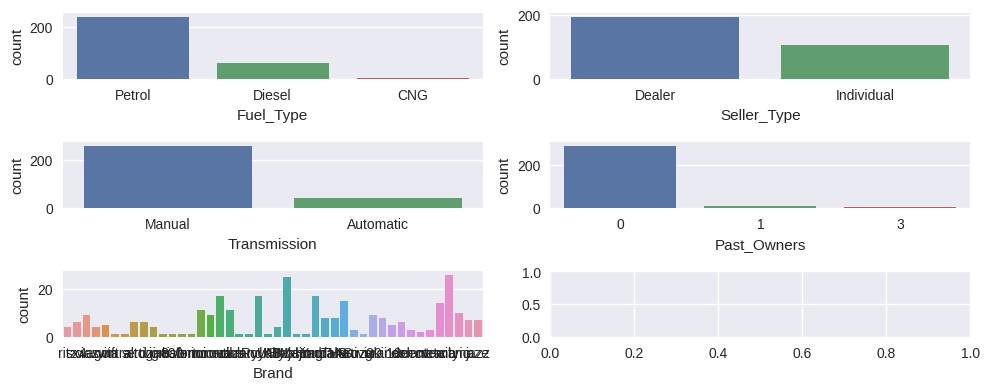

In [ ]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Brand']

fig, axes = plt.subplots(3, 2, figsize=(10, 4))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the categorical columns and create count plots
for i in range(len(cat_cols)):
    sns.countplot(x=cat_cols[i], data=df_car, ax=axes[i])

plt.tight_layout()
plt.show()

Box Plot

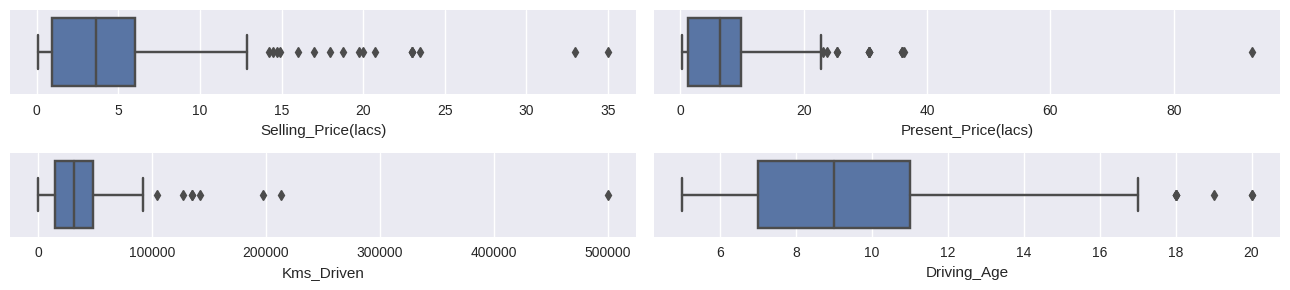

In [ ]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Driving_Age']

fig, axes = plt.subplots(2, 2, figsize=(13, 3))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the categorical columns and create count plots
for i in range(len(cat_cols)):
    if i < len(axes):
        sns.boxplot(x=num_cols[i], data=df_car, ax=axes[i])

plt.tight_layout()
plt.show()

Distribution Plot

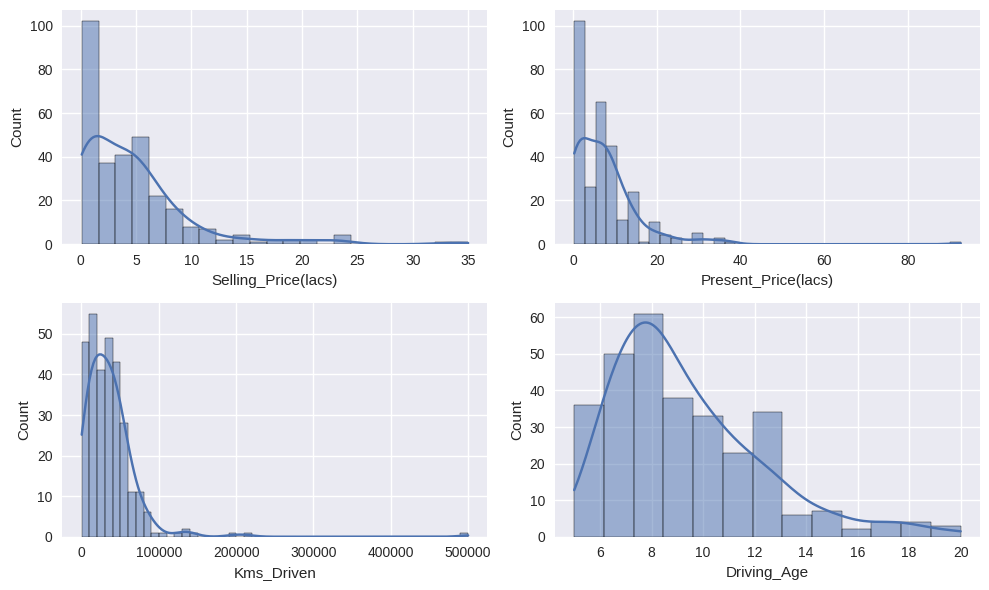

In [ ]:
num_cols = ['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the numerical columns and create distribution plots
for i in range(len(num_cols)):
    sns.histplot(df_car[num_cols[i]], ax=axes[i], kde=True)  # Use sns.histplot for distribution plots

plt.tight_layout()
plt.show()

The computer does not understand anything except numerical data, so let us convert the material categorical data to numerics. We shall be using label encoding for this purpose.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Brand']
for column in cat_cols:
    df_car[column] = encoder.fit_transform(df_car[column])

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Selling_Price(lacs)  301 non-null    float64
 1   Present_Price(lacs)  301 non-null    float64
 2   Kms_Driven           301 non-null    int64  
 3   Fuel_Type            301 non-null    int64  
 4   Seller_Type          301 non-null    int64  
 5   Transmission         301 non-null    int64  
 6   Past_Owners          301 non-null    int64  
 7   Driving_Age          301 non-null    int64  
 8   Brand                301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB


Multivariate analysis

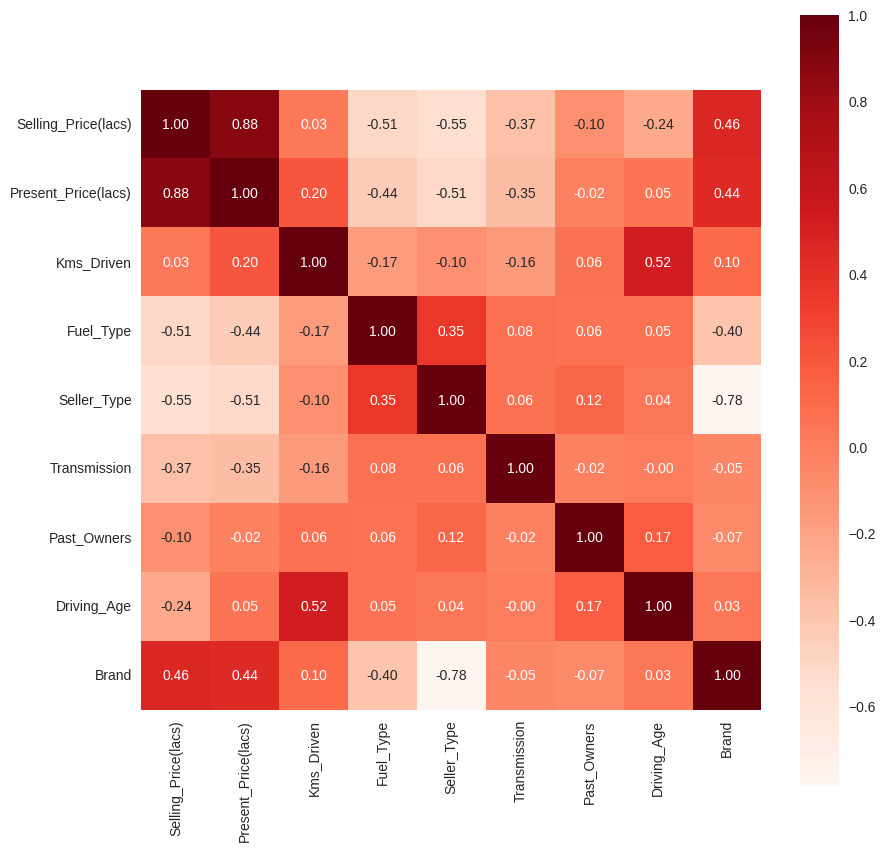

In [ ]:
corr = df_car.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'Reds', annot = True, square = True, fmt = '.2f')
plt.show()

We see the heatmap above correlating all the columns tothe selling price(*)

In [ ]:
corr['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Fuel_Type             -0.509467
Seller_Type           -0.550724
Transmission          -0.367128
Past_Owners           -0.096487
Driving_Age           -0.236141
Brand                  0.462362
Name: Selling_Price(lacs), dtype: float64

Let us break up the data into features and labels

In [ ]:
# Data split to features and Label
X = df_car.drop('Selling_Price(lacs)', axis = 1)
y = df_car['Selling_Price(lacs)']

Feature Analysis and Manipulation before we start making the model for prediction

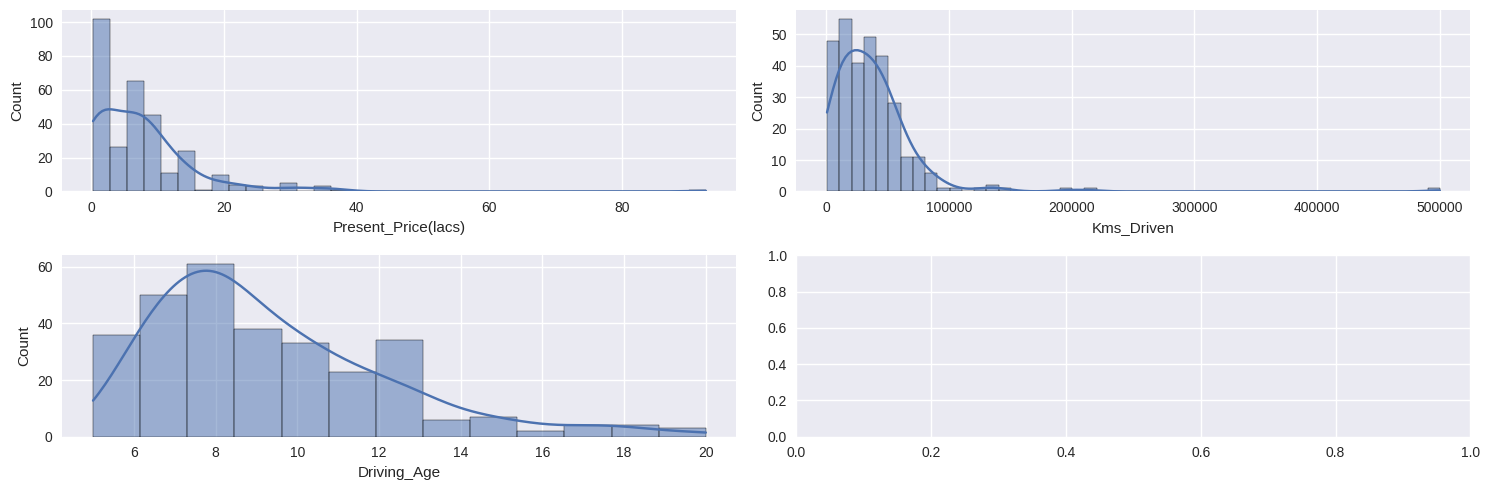

In [ ]:
num_cols = ['Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']

fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the numerical columns and create distribution plots
for i in range(len(num_cols)):
    sns.histplot(X[num_cols[i]], ax=axes[i], kde=True)  # Use sns.histplot for distribution plots

plt.tight_layout()
plt.show()

Feature and label Split

In [ ]:
col_num = ['Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']
X_num = X[col_num]
X_num.shape

(301, 3)

Z-score using StandardScaler

In [ ]:
#scaling the data is extremely important specially when we do not have much data to work with,
#standardization helps bring about more refined model
#Normalization z-score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_num)

column_names = ['Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']
X_nnorm = pd.DataFrame(X_norm, columns=column_names)

Log Transformation. (applied)

In [ ]:
# Applying a natural logarithm (base e) transformation

X_num['Driving_Age'] = np.log(X_num['Driving_Age'])
X_num['Present_Price(lacs)'] = np.log(X_num['Present_Price(lacs)'])
X_num['Kms_Driven'] = np.log(X_num['Kms_Driven'])

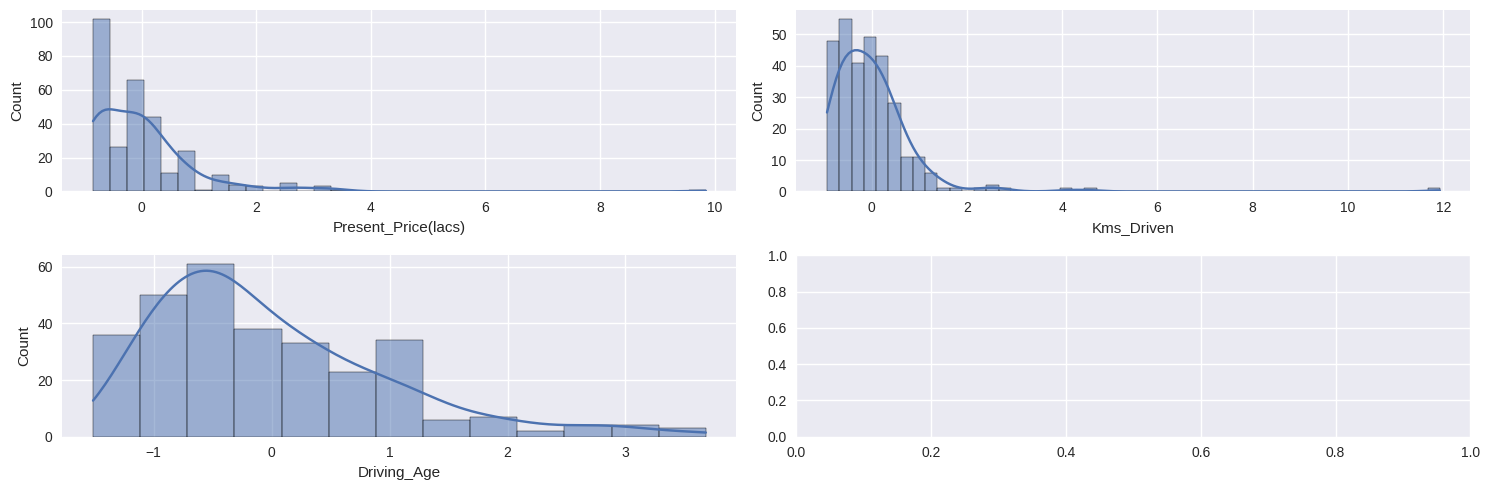

In [ ]:
# Distribution after transformation

num_cols = ['Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']

fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the numerical columns and create distribution plots
for i in range(len(num_cols)):
    sns.histplot(X_nnorm[num_cols[i]], ax=axes[i], kde=True)  # Use sns.histplot for distribution plots

plt.tight_layout()
plt.show()

In [ ]:
# X modifiy
X = X.drop(columns = ['Driving_Age', 'Present_Price(lacs)', 'Kms_Driven'], axis = 1)
X.head()

,Fuel_Type,Seller_Type,Transmission,Past_Owners,Brand
0,2,0,1,0,36
1,1,0,1,0,39
2,2,0,1,0,18
3,2,0,1,0,42
4,1,0,1,0,38


In [ ]:
X_num.head()

,Present_Price(lacs),Kms_Driven,Driving_Age
0,1.720979,10.203592,2.197225
1,2.255493,10.668955,2.302585
2,2.287471,8.839277,1.791759
3,1.423108,8.556414,2.484907
4,1.927164,10.656082,2.197225


Concatenating numerical and categorical columns to arrive at our X

In [ ]:
X = pd.concat([X, X_nnorm], axis = 1)
X.head()

,Fuel_Type,Seller_Type,Transmission,Past_Owners,Brand,Present_Price(lacs),Kms_Driven,Driving_Age
0,2,0,1,0,36,-0.236215,-0.256224,-0.128897
1,1,0,1,0,39,0.221505,0.155911,0.217514
2,2,0,1,0,18,0.257427,-0.773969,-1.168129
3,2,0,1,0,42,-0.403079,-0.817758,0.910335
4,1,0,1,0,38,-0.087890,0.141743,-0.128897


**Feature Selection**
Using ExtraTreesRegressor we can find out the importance of the features and based on that we can do the prediction. Using 6 most important feature from ETR we get 1% increase in evaluation.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

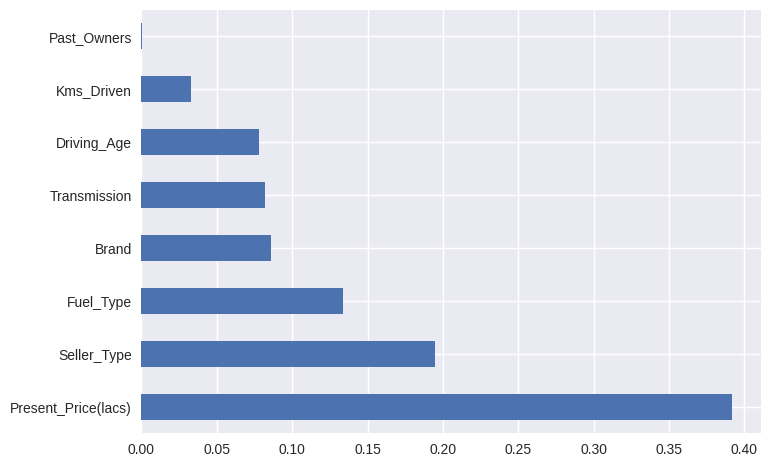

In [ ]:
feature_importances= pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(8).plot(kind = 'barh')
plt.show()

Final Selected features after trial.

In [ ]:
columns = ['Present_Price(lacs)', 'Seller_Type', 'Fuel_Type', 'Driving_Age', 'Transmission', 'Brand']

In [ ]:
X = X[columns]
X.head()

,Present_Price(lacs),Seller_Type,Fuel_Type,Driving_Age,Transmission,Brand
0,-0.236215,0,2,-0.128897,1,36
1,0.221505,0,1,0.217514,1,39
2,0.257427,0,2,-1.168129,1,18
3,-0.403079,0,2,0.910335,1,42
4,-0.087890,0,1,-0.128897,1,38


Model Creation and Evaluation against data set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(240, 6) (61, 6)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

We will be finding the R2 score and cross validation score for our implemented model.

The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset. Simply put, it is the difference between the samples in the dataset and the predictions made by the model.

Cross-validation is a technique used in machine learning and statistical modeling to assess the performance of a model and to prevent overfitting. It involves dividing the dataset into multiple subsets, using some for training the model and the rest for testing, multiple times to obtain reliable performance metrics.

In [ ]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

Implementing Linear Regression

Train R2-score : 0.88
Test R2-score : 0.85
Train CV scores : [0.89659161 0.85143791 0.78379252 0.82616114 0.90310963]
Train CV mean : 0.85


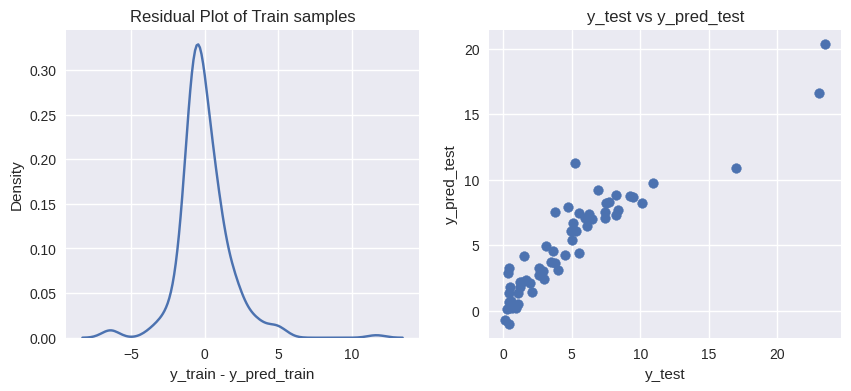

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [ ]:
lr.score(X_test,y_test)

0.8505845915709552

Apart from Linear Regression , we have hit and trialed a few other techniques. Given the limited data has proved a barrier in achieving higher scores.

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

The primary goal of LASSO regression is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes LASSO particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

Train R2-score : 0.88
Test R2-score : 0.85
Train CV scores : [0.8946471  0.84998538 0.78383631 0.82613506 0.90315737]
Train CV mean : 0.85


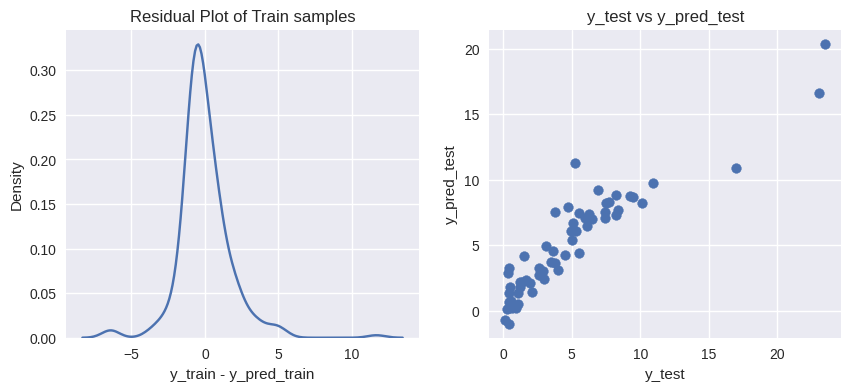

In [ ]:
#Implementation of LASSO regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

To be honest exploratory data analysis and feature engineering, outlier setermination are the most important steps in any ML model building. A little tweak in the data set often leads to fantastic discoveries of patterns and trends. I hope I have provided a clear walkthrough in the notebook and my approach was clear and comprehensible.